## Import Libraries

In [95]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Read dataframe

In [96]:
df = pd.read_csv(r"C:\Users\MANISH SHARMA\Music\Downloads\enodo_data.csv")
df

,Unnamed: 0,id,place of manufacture,watt,price,hours worked
0,0,23261,Japan,50,70,969
1,1,17185,Japan,50,95,933
2,2,15607,Japan,200,160,1506
3,3,15744,India,50,95,885
4,4,22002,Japan,200,160,1532
5,5,25478,India,200,160,1809
6,6,20131,India,50,95,968
7,7,18098,South Korea,100,130,1039
8,8,28228,India,50,70,763
9,9,20791,India,50,70,711


In [97]:
df = df[["id","place of manufacture","watt","price","hours worked"]]
df

,id,place of manufacture,watt,price,hours worked
0,23261,Japan,50,70,969
1,17185,Japan,50,95,933
2,15607,Japan,200,160,1506
3,15744,India,50,95,885
4,22002,Japan,200,160,1532
5,25478,India,200,160,1809
6,20131,India,50,95,968
7,18098,South Korea,100,130,1039
8,28228,India,50,70,763
9,20791,India,50,70,711


## Ques 1 : Bulbs are being manufactured in many countries and are being sold. Is there any relation between the number of hours for which the bulb worked and the place where it was manufactured?

## To answer this question , we can plot the countplot with the hour worked and place of manufactured to look for highest co-relation

South Korea    10
Japan           8
India           8
China           4
Name: place of manufacture, dtype: int64


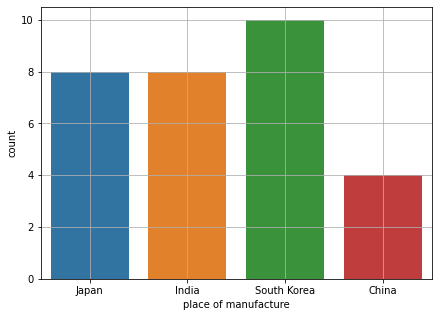

In [100]:
plt.figure(figsize  = (7,5))
sb.countplot(df["place of manufacture"])
plt.grid()
print(df["place of manufacture"].value_counts())

## Checking distribution of hours worked

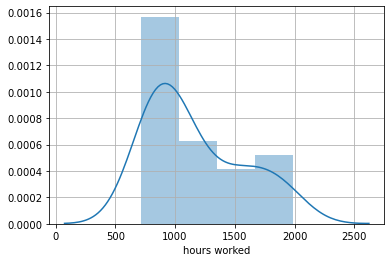

In [102]:
sb.distplot(df["hours worked"])
plt.grid()

## Majority lies in between 750 - 1200 hr

## We can check the hours worked count distribution for each place of manufacture , just to get an estimate of working done in each country

In [126]:
df.groupby('place of manufacture')["hours worked"].count()

place of manufacture
China           4
India           8
Japan           8
South Korea    10
Name: hours worked, dtype: int64

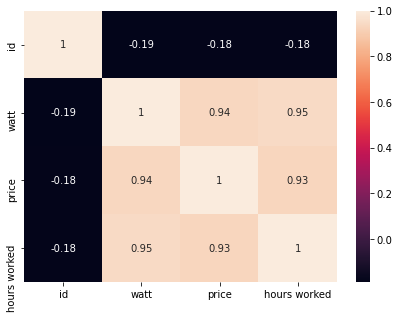

In [109]:
plt.figure(figsize = (7,5))
sb.heatmap(df.corr() , annot = True)

## We can clearly see , that watt and price is 94 % co-related and hours and watt for 95 % and also price and hours for 93 %

## By using a groupby function , we can clearly witness the country having the highest co-relation of hours worked of the bulb by taking the mean  !

In [105]:
df.groupby('place of manufacture')["hours worked"].mean().sort_values(ascending = False)

place of manufacture
Japan          1254.625
China          1200.500
South Korea    1134.000
India          1102.875
Name: hours worked, dtype: float64

## Hence , the answer is "Yes , there is a relation and JAPAN produces the bulb which glows for the maximum hours "

In [106]:
###########################################################################################################################

## Q2: Prefered place to manufacture 50 watts bulb

## Since , we just need to find the best place to look out for 50 watts out of (50,100,200) , we use a groupby function to look at the watts

## Do not forget , buying a 50 watt is only worth it , when the output is good ! Buying a 100 watt bulb and giving no sufficient result is useless !

## First we shall look at the heatmap of the dataset !

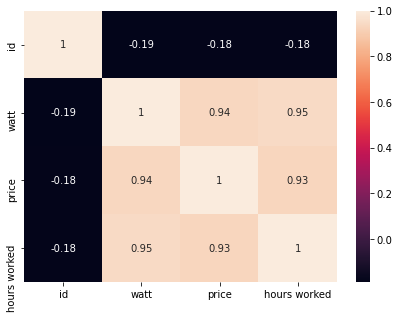

In [112]:
plt.figure(figsize = (7,5))
sb.heatmap(df.corr() , annot = True)

## Places with their mean watts

In [127]:
df.groupby('place of manufacture')["watt"].mean().sort_values(ascending = False)

place of manufacture
Japan          118.75
China          100.00
South Korea     95.00
India           93.75
Name: watt, dtype: float64

In [129]:
df.groupby('place of manufacture')["watt"].count()

place of manufacture
China           4
India           8
Japan           8
South Korea    10
Name: watt, dtype: int64

## The count of INDIA and JAPAN is same , so only thing to distinguish this country is the Price for 50 watt bulb !

## The places with their mean watts and mean price , with mean hour worked ! This pivot table helps to find solution for the answer !

In [130]:
df.groupby(['place of manufacture' , 'watt' , 'hours worked'])["price"].mean().sort_values(ascending = False)

# The last column is price

place of manufacture  watt  hours worked
South Korea           200   1986            190
India                 200   1792            190
China                 200   1922            190
Japan                 200   1760            160
India                 200   1809            160
South Korea           200   1580            160
Japan                 200   1532            160
                            1506            160
China                 100   1231            130
Japan                 100   1237            130
                            1157            130
South Korea           100   1039            130
                            1057            130
                            1492            130
India                 100   1106            130
South Korea           50    812              95
                            815              95
                            863              95
China                 50    903              95
Japan                 50    933              95

## When we refer the 50 watts column ,we see that INDIA produes 50 watts for an avg price of 95 , where as JAPAN on the other side produces the same 50 watts for 70 rupees with a great duration of 969 hr lifespan ! Wanna buy a great bulb of 50 watts for less price  ,head to JAPAN my friend :)  
## The Ans is JAPAN

In [131]:
###########################################################################################################################

## Ques 3 : Which country provides more efficiency (price to quality)

## This is tricky ques , cause wanting to find the efficiency wrt price and qualtiy ! The efficiency of bulbs range from one another (Ex : Efficiency of LED is far away from Incadescent bulb and CFL)

## Here , we have assumed the efficiency of Incadescent bulb

## Whenever you need to find efficiency of Bulb ,you need to understand and find the Lumen value !
## 1 lumen  = 15 times watt for incadescent

In [132]:
df["lumen"] = df["watt"]*15

In [134]:
df

,id,place of manufacture,watt,price,hours worked,lumen
0,23261,Japan,50,70,969,750
1,17185,Japan,50,95,933,750
2,15607,Japan,200,160,1506,3000
3,15744,India,50,95,885,750
4,22002,Japan,200,160,1532,3000
5,25478,India,200,160,1809,3000
6,20131,India,50,95,968,750
7,18098,South Korea,100,130,1039,1500
8,28228,India,50,70,763,750
9,20791,India,50,70,711,750


## After making a new col as "Lumen" , we try to plot the groupby func for the dataset, to find mean of all values and then try to approach the problem !

In [135]:
df.groupby(['place of manufacture' , 'watt' , 'lumen' , 'hours worked'])["price"].mean().sort_values(ascending = False)

place of manufacture  watt  lumen  hours worked
South Korea           200   3000   1986            190
India                 200   3000   1792            190
China                 200   3000   1922            190
Japan                 200   3000   1760            160
India                 200   3000   1809            160
South Korea           200   3000   1580            160
Japan                 200   3000   1532            160
                                   1506            160
China                 100   1500   1231            130
Japan                 100   1500   1237            130
                                   1157            130
South Korea           100   1500   1039            130
                                   1057            130
                                   1492            130
India                 100   1500   1106            130
South Korea           50    750    812              95
                                   815              95
                 

## The approach is : We will find the mean lumen , mean hour worked , mean price and mean watt of the bulb from each place and then divide the hours worked by watt , which will give us the efficiency and if some efficiency are equal , we will jump to see the Price value

## In short : If Mean Price is less , mean watt is more , mean lumen is more and mean hour is more : That is the preferred Country to choose !

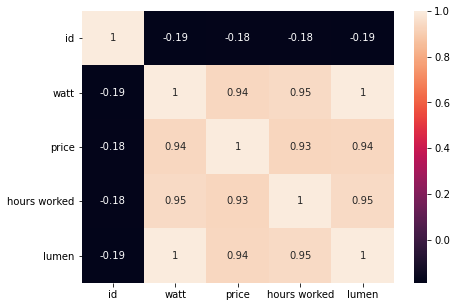

In [145]:
plt.figure(figsize = (7,5))
sb.heatmap(df.corr() , annot = True)

## As you can see , everything is related to each other perfectly 

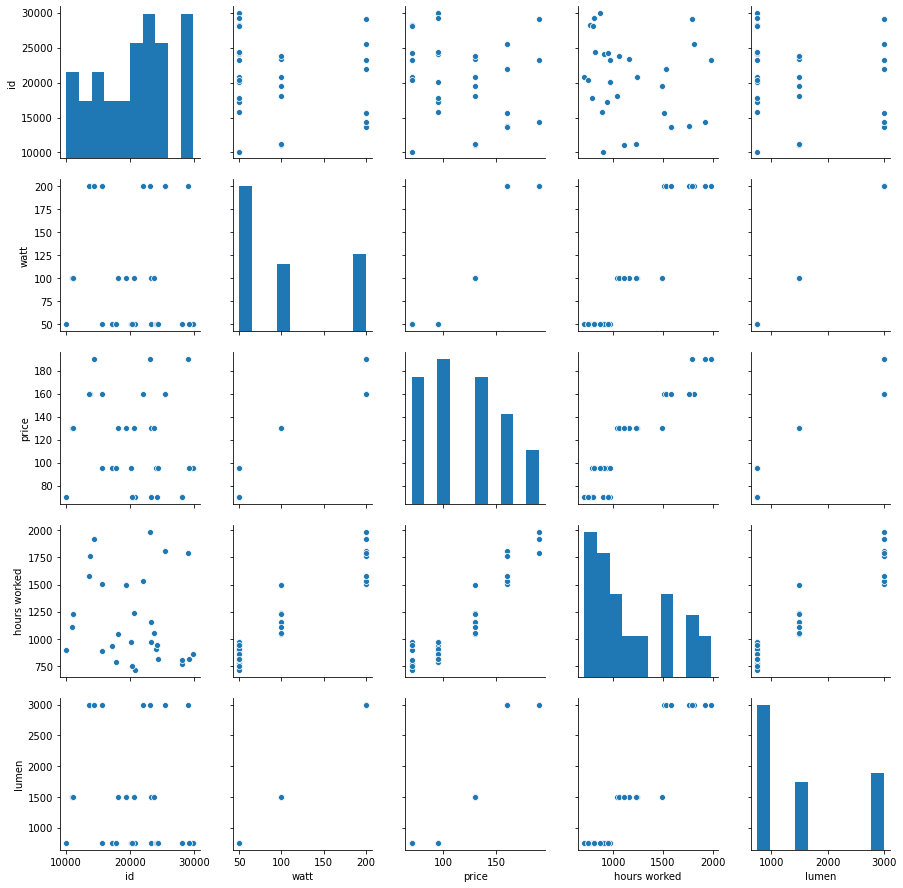

In [146]:
sb.pairplot(df)
plt.show()

## Find mean watt , mean lumen  ,mean hour and mean price for that particular row !
## Then divide mean hour worked by mean watt to get the efficiency

In [147]:
df.groupby(['place of manufacture' , 'watt' , 'lumen' , 'hours worked'])["price"].mean().sort_values(ascending = False)

place of manufacture  watt  lumen  hours worked
South Korea           200   3000   1986            190
India                 200   3000   1792            190
China                 200   3000   1922            190
Japan                 200   3000   1760            160
India                 200   3000   1809            160
South Korea           200   3000   1580            160
Japan                 200   3000   1532            160
                                   1506            160
China                 100   1500   1231            130
Japan                 100   1500   1237            130
                                   1157            130
South Korea           100   1500   1039            130
                                   1057            130
                                   1492            130
India                 100   1500   1106            130
South Korea           50    750    812              95
                                   815              95
                 

In [158]:
#INDIA

mean_watt = (200 + 200 + 100 + 50 + 50) / 5
mean_lumen = (3000 + 3000 + 1500 + 750 + 750) / 5
mean_hours = (1792 + 1809 + 1106 + 968 + 763 ) / 5
mean_price = (190 + 160 + 130 + 95+ 70) /5
print("Values for INDIA")
print("")
print("Mean Watt :",mean_watt)
print("Mean Lumen :",mean_lumen)
print("Mean hour :",mean_hours)
print("Mean price :",mean_price)
print("Efficiency in % is :" ,mean_hours / mean_watt )
print("Lumency is",mean_lumen / mean_watt)
print("Price for 1 watt",mean_price / mean_watt)



Values for INDIA

Mean Watt : 120.0
Mean Lumen : 1800.0
Mean hour : 1287.6
Mean price : 129.0
Efficiency in % is : 10.729999999999999
Lumency is 15.0
Price for 1 watt 1.075


In [159]:
#SOUTH KOREA

mean_watt = (200+ 200 + 100 + 50 + 50) / 5
mean_lumen = (3000 + 3000 + 1500 + 750 + 750) / 5
mean_hours = (1986 + 1580 + 1039 + 812 + 801) / 5
mean_price = (190 + 160 + 130 + 95 + 70) /5
print("Values for SOUTH KOREA")
print("")
print("Mean Watt :",mean_watt)
print("Mean Lumen :",mean_lumen)
print("Mean hour :",mean_hours)
print("Mean price :",mean_price)
print("Efficiency in % is :" ,mean_hours / mean_watt )
print("Lumency is",mean_lumen / mean_watt)
print("Price for 1 watt",mean_price / mean_watt)

Values for SOUTH KOREA

Mean Watt : 120.0
Mean Lumen : 1800.0
Mean hour : 1243.6
Mean price : 129.0
Efficiency in % is : 10.363333333333333
Lumency is 15.0
Price for 1 watt 1.075


In [160]:
#CHINA

mean_watt = (200 + 100 + 50 + 50) / 4
mean_lumen = (3000 + 1500 + 750 + 750) / 4
mean_hours = (903 + 746 + 1922 + 1231) / 4
mean_price = (190  + 130 + 95+ 70) /4
print("Values for CHINA")
print("")
print("Mean Watt :",mean_watt)
print("Mean Lumen :",mean_lumen)
print("Mean hour :",mean_hours)
print("Mean price :",mean_price)
print("Efficiency in % is :" ,mean_hours / mean_watt )
print("Lumency is",mean_lumen / mean_watt)
print("Price for 1 watt",mean_price / mean_watt)

Values for CHINA

Mean Watt : 100.0
Mean Lumen : 1500.0
Mean hour : 1200.5
Mean price : 121.25
Efficiency in % is : 12.005
Lumency is 15.0
Price for 1 watt 1.2125


In [163]:
#JAPAN

mean_watt = (200+ 200 + 100 + 50 + 50 + 50) / 6
mean_lumen = (3000 + 3000 + 1500 + 750 + 750+ 750) / 6
mean_hours = (1760 + 1532 + 1237 + 933 + 969 + 943) / 6
mean_price = (160 + 160 + 130 + 95 + 70 + 70) /6
print("Values for JAPAN")
print("")
print("Mean Watt :",mean_watt)
print("Mean Lumen :",mean_lumen)
print("Mean hour :",mean_hours)
print("Mean price :",mean_price)
print("Efficiency in % is :" ,mean_hours / mean_watt )
print("Lumency is",mean_lumen / mean_watt)
print("Price for 1 watt",mean_price / mean_watt)

Values for JAPAN

Mean Watt : 108.33333333333333
Mean Lumen : 1625.0
Mean hour : 1229.0
Mean price : 114.16666666666667
Efficiency in % is : 11.344615384615386
Lumency is 15.0
Price for 1 watt 1.0538461538461539


## There is actually many thing to look now , before actually coming to a conclusion !

## Since Efficiency of INDIA and SOUTH KOREA is less , we can rule them out !
## Now the left ones are JAPAN and CHINA 

## Since , the Efficiency of Japan is 11.34 % and China is 12.005 % , China wins here !
## but when having a look at 
## 1 : Mean Price : Japan mean price for the bulb is less than china 
## 2 : Price for 1 watt is less in japan than in China
## 3 : Mean hour of life span of Japan Bulb is 1229 hr , 29 hr greater than China (1220 hr)
## 4 : Mean Lumen is also higher in Japan , than in China 
    
## So , looking at all these points JAPAN win this case , even though it is just 1 % behind china, Statistical approach and Generalised Answer matters more than just jumping to the conclusion from one direction is what is think ! 

## We can also say that mean watt of JAPAN is 108 and China is 100 , this makes all the difference !
## But again applying the T-test and p-value , JAPAN wins !

## Ans : Japan